In [197]:

pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import datetime as dt
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold,RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [199]:
df=pd.read_csv('https://raw.githubusercontent.com/vgiannotta/Analysis-and-Prediction-of-Home-Prices/master/datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [200]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/94 [00:00<?, ?it/s]

C:\Users\krishna\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:146: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(
C:\Users\krishna\anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:210: RuntimeWarning: invalid value encountered in greater_equal
  bool_index = abs(correlation_matrix.values) >= threshold


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

Examining Null Values

1)Replace all the null values in categorical columns with 'NA'
<BR>
2) Replace all the null values in numerical columns with 0.0  
<BR>

In [201]:
df.isnull().sum().sort_values(ascending=False)[:27]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
dtype: int64

In [202]:
# Replacing nulls with 'NA' for all categorical data:

na_columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Finish', 'Garage Cond', 
              'Garage Qual', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 2', 'Bsmt Cond', 
              'Bsmt Qual', 'Mas Vnr Type'] 

[df[x].replace(np.nan, 'NA', inplace=True) for x in na_columns]

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [203]:
zero_columns = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath', 'Bsmt Full Bath', 
                'Garage Cars', 'Garage Area', 'Bsmt Unf SF', 'BsmtFin SF 2', 'Total Bsmt SF', 'BsmtFin SF 1']

[df[x].replace(np.nan, '0.0', inplace=True) for x in zero_columns]

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [204]:
# Converting all "None" values to 'NA':

df.replace('None', 'NA', inplace=True)
df['Mas Vnr Type'].unique()

array(['BrkFace', 'NA', 'Stone', 'BrkCmn'], dtype=object)

Few of the datatypes are of string type which should be converted to float

In [205]:
df['Mas Vnr Area']

0       289
1       132
2         0
3         0
4         0
       ... 
2046      0
2047      0
2048      0
2049      0
2050      0
Name: Mas Vnr Area, Length: 2051, dtype: object

In [206]:
floatify = ['Lot Frontage', 'Mas Vnr Area', 'Garage Area', 'Garage Cars']

for x in floatify:
    df[x] = df[x].astype('float64', copy=False)

Here we have lot of bathroom variables which can be converted to 1 variable or consolidated

In [207]:
baths = [x for x in df.columns if 'Bath' in x]
baths

['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']

In [208]:
df['Total Baths'] = df[baths].sum(axis=1)
df.drop(['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)

Garage varable for this One hot key encoding can be done 

In [209]:
# Creating 'Has Finished Garage' column for Finished or Rough Finished garages, and 'Has Detached Garage' column

searchfor = 'Fin', 'RFn'
df['Has Finished Garage'] = np.where(df['Garage Finish'].str.contains('|'.join(searchfor)), 1, 0)

df['Detached Garage'] = np.where(df['Garage Type'].str.contains('Detchd'), 1, 0)

df.drop(['Garage Finish', 'Garage Yr Blt', 'Garage Type',], axis=1, inplace=True)

There were multiple categorical columns describing type of basement finish, so I converted these into a one-hot encoded ‘Has Finished Basement’ column and dropped the originals.

In [210]:
lookfor = 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'

df['Has Finished Basement'] = np.where(df['BsmtFin Type 2'].str.contains('|'.join(lookfor)), 1, 0)
df['Has Finished Basement'] = np.where(df['BsmtFin Type 1'].str.contains('|'.join(lookfor)), 1, 0)


df.drop(['BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Exposure'], axis=1, inplace=True)

All columns describing square footage were added together into a single ‘Total sq ft’ column

In [211]:
# Creating a new column of total square feet

sq_ft = [x for x in df.columns if 'SF' in x]

df['Total sq ft'] = df[sq_ft].sum(axis=1)

I chose to convert this year column into ‘Age,’ as a way of addressing the nebulous relationship between year as a point in time, and year as a number.

In [212]:

# Converting 'Year Remod/Add' to numerical 'Is Remodeled'

df['Is Remodeled'] = np.where(df['Year Remod/Add'] - df['Year Built'] > 0, 1, 0)
df.drop(['Year Remod/Add'], axis=1, inplace=True)

‘Pool QC’ changed to ‘Has Pool’

In [213]:

# Pool

df['Has Pool'] = np.where(df['Pool QC'].str.contains('NA'), 0, 1)
df.drop(['Pool QC'], axis=1, inplace=True)

Same for fence 

In [214]:
# Fence

df['Has Fence'] = np.where(df['Fence'].str.contains('NA'), 0, 1)
df.drop(['Fence'], axis=1, inplace=True)

In [215]:

# Paved Drive

df['Has Paved Drive'] = np.where(df['Paved Drive'].str.contains('N'), 0, 1)
df.drop(['Paved Drive'], axis=1, inplace=True)

In [216]:
# Central Air

df['Has Central Air'] = np.where(df['Central Air'].str.contains('N'), 0, 1)
df.drop(['Central Air'], axis=1, inplace=True)

# One hot key encoding

In [217]:
# Created dummy columns

df = pd.get_dummies(df, columns = ['Lot Config', 'MS Zoning', 'Misc Feature', 'Heating QC', 
                                   'House Style', 'Bldg Type'], drop_first=True)

In [218]:
# Quality rankings - transforming categorical vairables to ordinal ones

cols = ['Bsmt Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Exter Qual', 
        'Exter Cond', 'Kitchen Qual', 'Exter Qual', 'Exter Cond']

rankings = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for x in cols:
    df[x] = df[x].map(lambda x: rankings.get(x, x))

In [219]:
# Turning the 'Year Built' column into 'Age'

now = dt.datetime.now()
df['Current Year'] = now.year
df['Age'] = df['Current Year'] - df['Year Built']
df.drop(['Current Year', 'Year Built', 'Mo Sold', 'Yr Sold', 'Misc Feature_TenC'], axis=1, inplace=True)

In [220]:
# Dropping the remaining object columns

df.drop(df.select_dtypes(include=['object']).columns, axis=1, inplace=True)

In [221]:
# Saving the cleaned data to a .csv file 

df.to_csv('train_v2.csv', index=False)

# EDA

In [222]:
df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,5.794442e+01,3.313733e+01,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
Mas Vnr Area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0
Exter Qual,2051.0,3.406143e+00,5.879616e-01,2.0,3.0,3.0,4.0,5.0
Exter Cond,2051.0,3.085812e+00,3.727924e-01,1.0,3.0,3.0,3.0,5.0


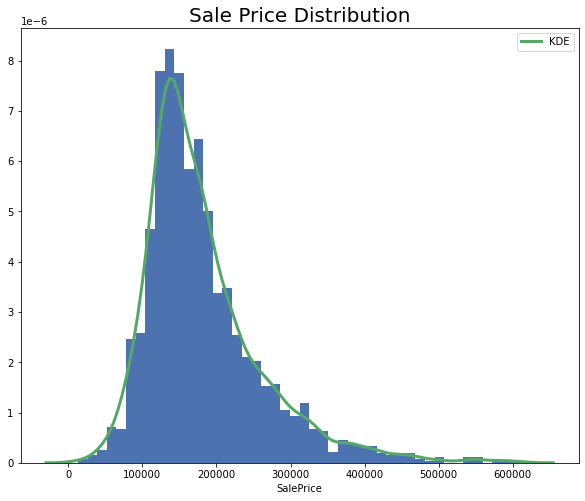

In [223]:
sns.set_color_codes("deep")
plt.figure(figsize=(10, 8))
sns.distplot(df['SalePrice'], kde_kws={"color": "g", "lw": 3, "label": "KDE"},
                              hist_kws={"alpha": 1, "color": "b"})
plt.title("Sale Price Distribution", fontsize=20);

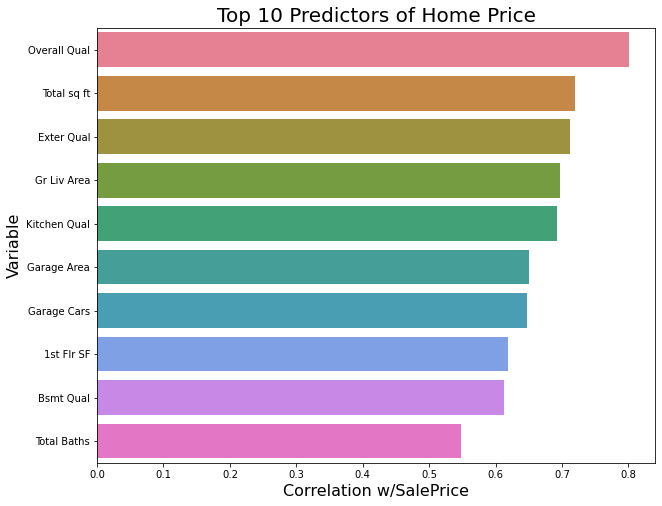

In [224]:
predictors = df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)
corr_df = pd.DataFrame(predictors.iloc[1:11])

plt.figure(figsize=(10, 8))
sns.barplot( corr_df['SalePrice'], corr_df.index, palette='husl')
plt.title('Top 10 Predictors of Home Price', fontsize=20)
plt.xlabel('Correlation w/SalePrice', fontsize=16)
plt.ylabel('Variable', fontsize=16)
plt.show()

In [225]:
corr_df['SalePrice']

Overall Qual    0.800207
Total sq ft     0.718975
Exter Qual      0.712146
Gr Liv Area     0.697038
Kitchen Qual    0.692336
Garage Area     0.649897
Garage Cars     0.647781
1st Flr SF      0.618486
Bsmt Qual       0.612188
Total Baths     0.547758
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Overall Quality Rating vs Sale Price')

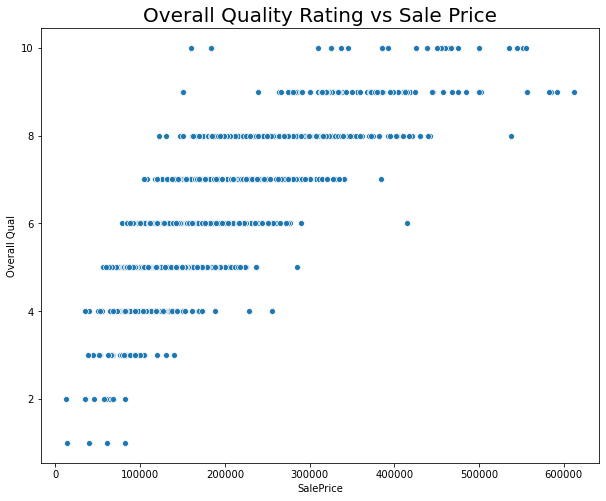

In [226]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SalePrice', y='Overall Qual', data=df)
plt.title('Overall Quality Rating vs Sale Price', fontsize=20)

Text(0.5, 1.0, 'Total Square Footage vs Sale Price')

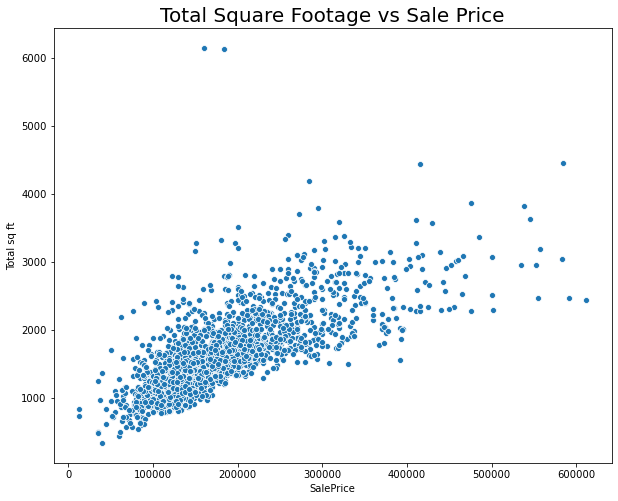

In [227]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='SalePrice', y='Total sq ft', data=df)
plt.title('Total Square Footage vs Sale Price', fontsize=20)

Text(0.5, 1.0, 'Exterior Quality Rating vs Sale Price')

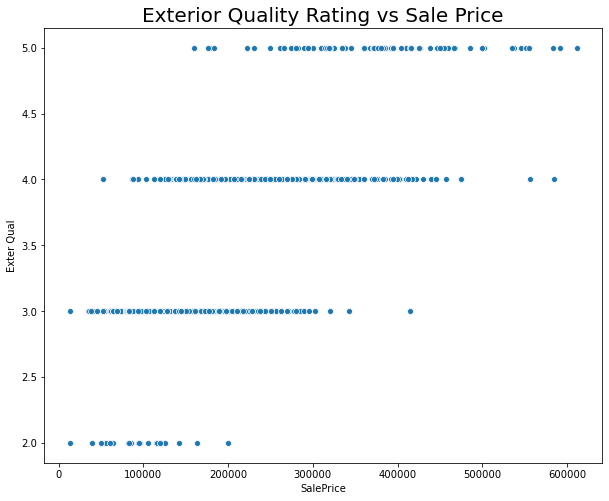

In [228]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='SalePrice', y='Exter Qual', data=df)
plt.title('Exterior Quality Rating vs Sale Price', fontsize=20)

# Modeling building & Evaluation

In [229]:
df=pd.read_csv('https://raw.githubusercontent.com/vgiannotta/Analysis-and-Prediction-of-Home-Prices/master/datasets/train_v2.csv')
df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Age
0,109,533352170,60,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,42
1,544,531379050,60,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,22
2,153,535304180,20,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,65
3,318,916386060,60,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,12
4,255,906425045,50,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,118


#  Preprocessing of data

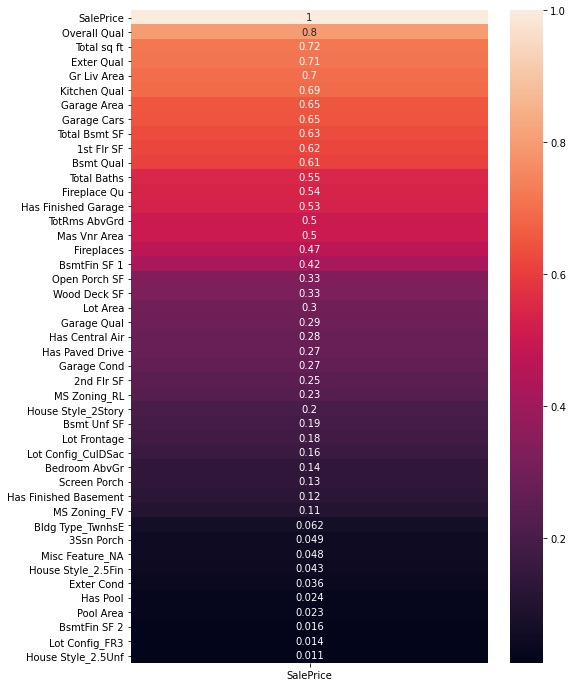

In [230]:
# Selecting the best variables and setting them as predictors for the model

correlations = df.corr()['SalePrice'][df.corr()['SalePrice'] >= 0]
corr_list = [x for x in correlations.index if x != 'SalePrice']

plt.figure(figsize=(8, 12))
sns.heatmap(correlations.to_frame().sort_values('SalePrice', ascending=False), annot=True)

Train Test Split

In [231]:
X = df[corr_list]
y = df['SalePrice']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Linear Regression Algorithm

In [232]:
lm=LinearRegression()

In [233]:
model=lm.fit(X_train,y_train)

In [234]:
print("\033[1mIntercept: \033[0m",model.intercept_)
print("\033[1mCoefficients: \033[0m",model.coef_)

pred=model.predict(X_test)

print('\033[1mR^2:\033[0m', r2_score(y_test, pred))

accuracy=(explained_variance_score(y_test,pred))*100
print('\033[1mAccuracy:\033[0m',accuracy)
R2=r2_score(y_test, pred)
print('\033[1mRoot Mean Squared Error:\033[0m',rmse(y_test, pred))
Adj_r2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)
print('\033[1mAdj_r2:\033[0m',Adj_r2)
residuals=np.array(y_test-pred)

Intercept:  -171914.09991355156
Coefficients:  [ 7.03992503e+01  6.26099430e-01  1.27904310e+04  2.57015453e+01
  1.98060562e+04  4.55610217e+02  8.66060926e+03  6.20055133e+00
  3.03578182e-01 -4.58603555e+00  1.91809393e+00  3.79153495e+01
  2.89092844e+01 -9.86234494e-01 -2.94200572e+03  1.38190803e+04
  3.55042291e+03 -3.12852797e+03  4.12985288e+03  8.18849852e+03
  1.43174041e+01  1.97926795e+03 -7.31763014e+03  1.79407036e+01
 -1.50254332e+01  4.14401678e+01  8.85505966e+01  1.72443404e+01
  2.51678693e+03  2.26557765e+03  1.00101338e+04  1.92903579e+00
 -7.40739118e+04  3.23360814e+03  1.92215875e+03  1.47842488e+04
  1.29284496e+02  5.01162323e+03  4.50504177e+03  9.97796077e+03
  5.03612280e+04 -5.80560800e+03 -7.92473192e+03 -1.42552496e+04]
R^2: 0.8633601690840299
Accuracy: 86.41150802038749
Root Mean Squared Error: 28492.940747953413
Adj_r2: 0.846933522744405


In [235]:
comp = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared'])

In [236]:
a = pd.Series({
                     'Model_Name': "Linear regression",
                     'R-Squared': r2_score(y_test, pred),
                     'Adj. R-Squared': Adj_r2     
                   })

In [237]:
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.86336,0.846934


# Data scaling 

In [238]:
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)


In [239]:
X_train_sc,X_test_sc,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [240]:
model=lm.fit(X_train_sc,y_train)

In [241]:
print("\033[1mIntercept: \033[0m",model.intercept_)
print("\033[1mCoefficients: \033[0m",model.coef_)

pred=model.predict(X_test_sc)

print('\033[1mR^2:\033[0m', r2_score(y_test, pred))

accuracy=(explained_variance_score(y_test,pred))*100
print('\033[1mAccuracy:\033[0m',accuracy)
R2=r2_score(y_test, pred)
print('\033[1mRoot Mean Squared Error:\033[0m',rmse(y_test, pred))
Adj_r2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)- X_test_sc.shape[1]-1)
print('\033[1mAdj_r2:\033[0m',Adj_r2)


Intercept:  -171914.09991355156
Coefficients:  [ 7.03992503e+01  6.26099430e-01  1.27904310e+04  2.57015453e+01
  1.98060562e+04  4.55610217e+02  8.66060926e+03  6.20055133e+00
  3.03578182e-01 -4.58603555e+00  1.91809393e+00  3.79153495e+01
  2.89092844e+01 -9.86234494e-01 -2.94200572e+03  1.38190803e+04
  3.55042291e+03 -3.12852797e+03  4.12985288e+03  8.18849852e+03
  1.43174041e+01  1.97926795e+03 -7.31763014e+03  1.79407036e+01
 -1.50254332e+01  4.14401678e+01  8.85505966e+01  1.72443404e+01
  2.51678693e+03  2.26557765e+03  1.00101338e+04  1.92903579e+00
 -7.40739118e+04  3.23360814e+03  1.92215875e+03  1.47842488e+04
  1.29284496e+02  5.01162323e+03  4.50504177e+03  9.97796077e+03
  5.03612280e+04 -5.80560800e+03 -7.92473192e+03 -1.42552496e+04]
R^2: 0.8633601690840299
Accuracy: 86.41150802038749
Root Mean Squared Error: 28492.940747953413
Adj_r2: 0.846933522744405


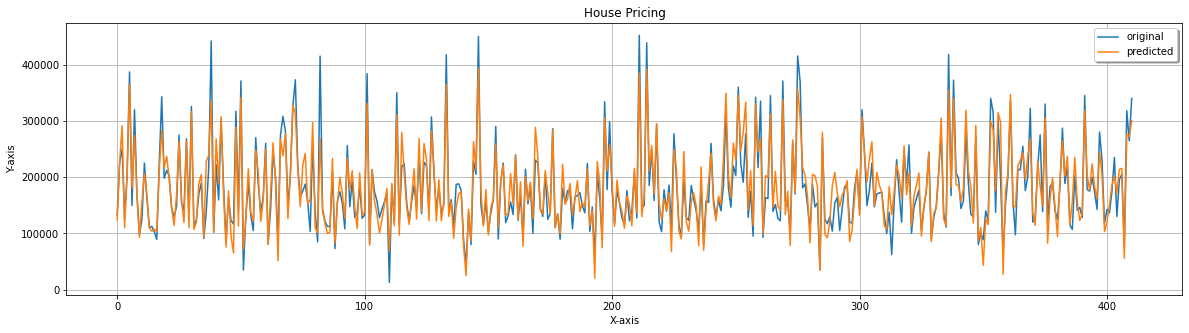

In [242]:
plt.figure(figsize=(20,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("House Pricing")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [243]:
pred=model.predict(X_test_sc)
pred

array([123984.48199421, 227361.03850434, 291335.8339391 , 110185.92471406,
       200776.8181133 , 365072.73834694, 180557.37009292, 274367.42036465,
       166503.71497886,  92864.72891687, 154997.13727845, 206371.00172612,
       170073.81136119, 109429.12918629, 103953.63023673, 107294.42198618,
       103312.20269956, 211858.15842726, 283041.58286736, 216782.56569127,
       237208.94010906, 198591.44052613, 145932.99684279, 114107.12407173,
       168472.75958756, 263651.4135855 , 158328.93522715, 119564.53610152,
       264483.99729246, 110194.74193839, 316262.73439003, 107177.74772261,
       119948.67037915, 187954.34719368, 204686.71678471,  93607.87041093,
       228343.69983527, 238692.69668644, 336039.27145955, 102508.67600276,
       267937.20816267, 187437.29930705, 307444.40391105, 167451.00471301,
        75643.55880175, 175650.58858377,  96097.27639924,  65280.50200229,
       288537.96264768, 113085.39959128, 341636.15149993,  71998.14147799,
       126645.53840126, 2

In [244]:
residuals=np.array(y_test-pred)
residuals

array([ 8.51551801e+03, -1.36103850e+03, -4.13358339e+04,  1.78140753e+04,
        2.38318189e+03,  2.19272617e+04, -3.10573701e+04,  4.55325796e+04,
        1.39628502e+03,  5.13527108e+03, -2.99971373e+04,  1.86289983e+04,
       -7.57381136e+03,  5.70870814e+02,  8.54636976e+03, -4.29442199e+03,
       -1.38122027e+04,  1.31418416e+04,  5.96014171e+04, -1.87825657e+04,
       -2.52089401e+04,  3.90855947e+03, -9.32996843e+02,  1.48428759e+04,
       -2.04727596e+04,  1.13485864e+04, -3.32893523e+03,  2.14354639e+04,
        3.51600271e+03,  1.53052581e+04,  9.36126561e+03,  4.07225228e+03,
        4.05132962e+03, -1.79543472e+04, -1.46867168e+04, -2.60787041e+03,
       -9.08436998e+04, -2.16926967e+04,  1.05889729e+05, -5.08676003e+02,
       -4.59372082e+04, -2.79372993e+04, -5.44440391e+03,  1.60489953e+04,
        9.85644120e+03, -1.26505886e+04,  2.68027236e+04,  5.12194980e+04,
        2.84620374e+04,  2.68146004e+04,  2.93308485e+04, -3.70981415e+04,
        4.35446160e+03, -

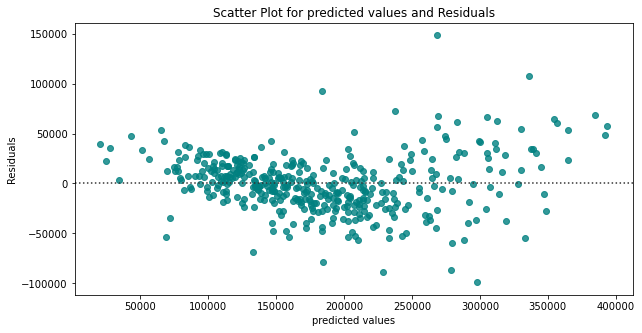

In [245]:
plt.figure(figsize=(10,5))
sns.residplot(x = pred, y = residuals, color='teal')
plt.title('Scatter Plot for predicted values and Residuals')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.show()

In [246]:
comp = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared'])

In [247]:
a = pd.Series({
                     'Model_Name': "Linear regression after Scaling",
                     'R-Squared': r2_score(y_test, pred),
                     'Adj. R-Squared': Adj_r2     
                   })

In [248]:
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression after Scaling,0.86336,0.846934


In [249]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(lm, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)
scores

array([0.88823873, 0.81040419, 0.82645436, 0.8524794 , 0.70196558,
       0.81386801, 0.86821038, 0.87828202, 0.87544491, 0.63738177])

In [250]:
R2=mean(absolute(scores))
print("r2:",mean(absolute(scores)))
Adj_r2 = 1-(1-R2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
print('Adj_r2:',Adj_r2)

r2: 0.8152729366714301
Adj_r2: 0.8112210967978224


In [251]:
a = pd.Series({
                     'Model_Name': "Linear regression with KFold Cross validation",
                     'R-Squared': R2,
                     'Adj. R-Squared': Adj_r2     
                   })


comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression after Scaling,0.863360,0.846934
1,Linear regression with KFold Cross validation,0.815273,0.811221


In [252]:
cv = RepeatedKFold(n_splits=10,n_repeats=10, random_state=1)

scores = cross_val_score(lm, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)
R2=mean(absolute(scores))
print("r2:",mean(absolute(scores)))

r2: 0.8102355531622902


In [253]:
scores

array([0.88823873, 0.81040419, 0.82645436, 0.8524794 , 0.70196558,
       0.81386801, 0.86821038, 0.87828202, 0.87544491, 0.63738177,
       0.86346621, 0.81175756, 0.85555005, 0.57096544, 0.83118171,
       0.70875281, 0.85812558, 0.86928367, 0.89961178, 0.87875958,
       0.85923158, 0.89195984, 0.483192  , 0.85708446, 0.87173298,
       0.80076692, 0.6713513 , 0.8659145 , 0.82647608, 0.8902236 ,
       0.85068574, 0.8250148 , 0.88291922, 0.71387437, 0.86857152,
       0.85707859, 0.84857824, 0.87452082, 0.60528152, 0.8661857 ,
       0.82235373, 0.86370643, 0.6820772 , 0.82927365, 0.87603855,
       0.8602748 , 0.86023856, 0.88061667, 0.5722126 , 0.84857204,
       0.85590755, 0.89756546, 0.81924658, 0.70410523, 0.86185878,
       0.89032718, 0.40925308, 0.8522714 , 0.85453475, 0.8471261 ,
       0.87586519, 0.89042395, 0.67738013, 0.86529087, 0.62302656,
       0.89213771, 0.84723859, 0.79294239, 0.86094057, 0.84603649,
       0.87175846, 0.9048053 , 0.82437582, 0.84058042, 0.81752

In [254]:
Adj_r2 = 1-(1-R2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
print('Adj_r2:',Adj_r2)

Adj_r2: 0.8060732223243744


In [255]:
a = pd.Series({
                     'Model_Name': "Linear regression with Repeated KFold Cross validation",
                     'R-Squared': R2,
                     'Adj. R-Squared': Adj_r2     
                   })


comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression after Scaling,0.863360,0.846934
1,Linear regression with KFold Cross validation,0.815273,0.811221
2,Linear regression with Repeated KFold Cross va...,0.810236,0.806073
